<a href="https://colab.research.google.com/github/Kamalesh-Seervi/Fraud_detection_using_openCV/blob/main/Copy_of_gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Load data
data = pd.read_csv('/content/drive/MyDrive/urldata.csv')

# Split data into X and y
X = data.drop(columns=['Label', 'Domain'])
y = data['Label']

# Preprocess data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], 1), activation='tanh', recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(32, activation='tanh', recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

checkpoint_path = "/content/drive/MyDrive/checkpoint/"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=True,monitor='val_accuracy')
# Train model
history = model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32, callbacks=[cp_callback], validation_data=(X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1)), y_valid))

# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
print('Test accuracy:', test_acc)

Epoch 1/100
37/37 [==============================] - 9s 114ms/step - loss: 0.6516 - accuracy: 0.6323 - val_loss: 0.6175 - val_accuracy: 0.7021
Epoch 2/100
37/37 [==============================] - 5s 129ms/step - loss: 0.5761 - accuracy: 0.7070 - val_loss: 0.4544 - val_accuracy: 0.7808
Epoch 3/100
37/37 [==============================] - 4s 115ms/step - loss: 0.3592 - accuracy: 0.8471 - val_loss: 0.3224 - val_accuracy: 0.8630
Epoch 4/100
37/37 [==============================] - 4s 101ms/step - loss: 0.3218 - accuracy: 0.8651 - val_loss: 0.2972 - val_accuracy: 0.8733
Epoch 5/100
37/37 [==============================] - 4s 115ms/step - loss: 0.3155 - accuracy: 0.8720 - val_loss: 0.2909 - val_accuracy: 0.8767
Epoch 6/100
37/37 [==============================] - 5s 133ms/step - loss: 0.3122 - accuracy: 0.8686 - val_loss: 0.2923 - val_accuracy: 0.8767
Epoch 7/100
37/37 [==============================] - 4s 102ms/step - loss: 0.3093 - accuracy: 0.8754 - val_loss: 0.2825 - val_accuracy: 0.8699

Best Validation Loss: 0.18662160634994507
Best Validation Accuracy: 0.9383561611175537


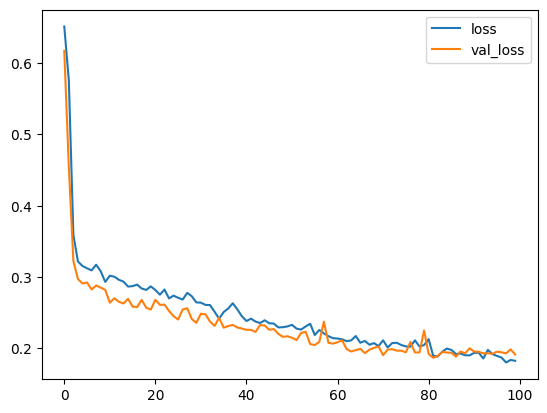

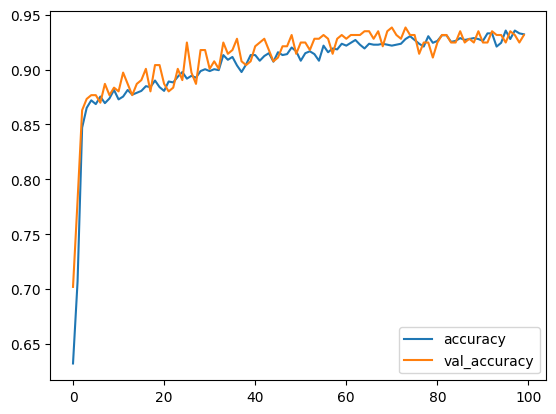

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

print(f"Best Validation Loss: {history_df['val_loss'].min()}" +\
      f"\nBest Validation Accuracy: {history_df['val_accuracy'].max()}")
      # f"\nBest Recall: {history_df['val_recall'].max()}" +\
      # f"\nBest Precision: {history_df['val_precision'].max()}"
